# malignant comment classification

## Data Set Description

## Task:To create a model to predict each type of toxicity for each comment. 

In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
train=pd.read_csv('train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


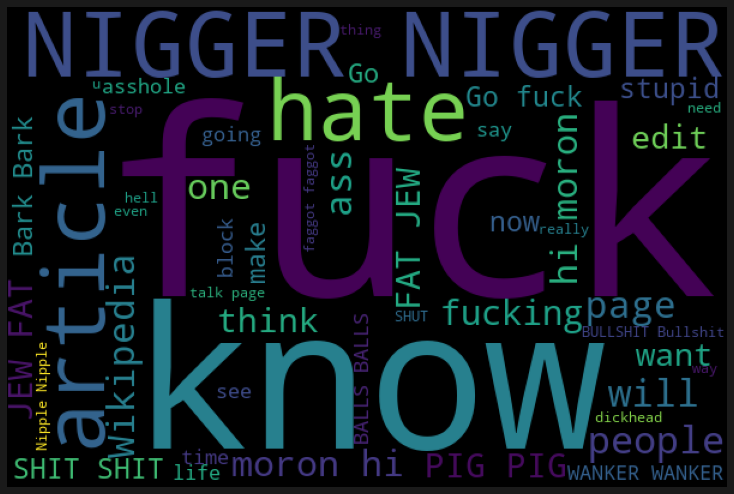

In [66]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

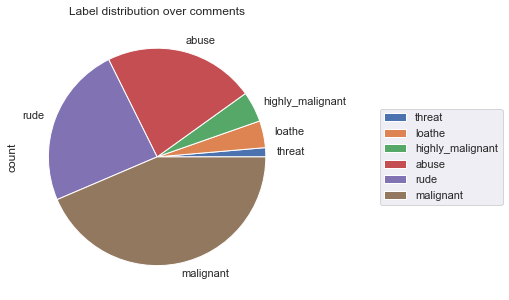

In [67]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5))\
.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [17]:
train['target'] = train.pop('malignant').astype(str) +train.pop('highly_malignant').astype(str)+ train.pop('rude').astype(str)+train.pop('threat').astype(str)+train.pop('abuse').astype(str) + train.pop('loathe').astype(str)
train.head()

,id,comment_text,target
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,000000
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,000000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",000000
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",000000
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",000000


In [3]:
test=pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [28]:
# Let us find out the frequency of occurence of multilabelled data
train['target'].value_counts()

000000    143346
100000      5666
101010      3800
101000      1758
100010      1215
111010       989
101011       618
001000       317
000010       301
111011       265
001010       181
111000       158
100001       136
100011       134
101110       131
100100       113
111110        64
101111        56
000001        54
110000        41
101001        35
111111        31
000011        28
000100        22
001011        18
100110        16
110010        14
101100        11
110100        11
110011         7
100101         7
111001         6
111100         4
000110         3
110001         3
100111         3
001001         3
001100         2
001110         2
110101         1
110110         1
Name: target, dtype: int64

In [21]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [22]:
train['length'] = train['comment_text'].str.len()
train.head(2)

,id,comment_text,target,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,000000,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,000000,112


In [23]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))


In [24]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,target,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,000000,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,000000,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",000000,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,000000,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",000000,67,47


In [25]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())


Origian Length 62893130
Clean Length 43575187


In [31]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [32]:
y=train['target']

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [37]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9270897680373146
Test accuracy is 0.9172376336898396
[[42841     0     0 ...     0     0     0]
 [   13     0     0 ...     0     0     0]
 [   91     0     0 ...     0     0     0]
 ...
 [    6     0     0 ...     5     0     0]
 [    4     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      000000       0.95      1.00      0.97     42950
      000001       0.00      0.00      0.00        15
      000010       0.00      0.00      0.00       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.00      0.00      0.00        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.32      0.16      0.21      1723
      100001       0.40      0.06      0.10        34
      100010       0.37      0.08      0.14       373
      100011       0.00      0.00      0.00        44
      100100       0.50      0.07      0.12        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.43    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9971530631429109
Test accuracy is 0.8960352606951871
[[41750     3    29 ...     0     0     0]
 [   11     0     0 ...     0     0     0]
 [   64     0     1 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    4     0     0 ...     0     1     0]
 [    1     0     0 ...     0     0     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

      000000       0.96      0.97      0.97     42950
      000001       0.00      0.00      0.00        15
      000010       0.02      0.01      0.01       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.09      0.05      0.07        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.23      0.20      0.21      1723
      100001       0.00      0.00      0.00        34
      100010       0.21      0.18      0.19       373
      100011       0.16      0.07      0.10        44
      100100       0.20      0.14      0.17        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.25    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9971441105112848
Test accuracy is 0.9144385026737968
[[42698     0     1 ...     0     0     0]
 [   13     0     0 ...     0     0     0]
 [   93     0     0 ...     0     0     0]
 ...
 [    7     0     0 ...     5     0     0]
 [    4     0     0 ...     0     1     0]
 [    2     0     0 ...     0     0     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      000000       0.95      0.99      0.97     42950
      000001       0.00      0.00      0.00        15
      000010       0.00      0.00      0.00       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.00      0.00      0.00        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.32      0.10      0.15      1723
      100001       0.00      0.00      0.00        34
      100010       0.27      0.08      0.13       373
      100011       0.27      0.07      0.11        44
      100100       0.47      0.25      0.33        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.38    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

C:\Users\heman\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9414676944287773
Test accuracy is 0.9138118315508021
[[42755     0     0 ...     0     0     0]
 [   15     0     0 ...     0     0     0]
 [   88     0     0 ...     0     0     0]
 ...
 [    5     0     0 ...     8     1     0]
 [    2     0     0 ...     0     1     0]
 [    1     0     0 ...     0     2     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      000000       0.95      1.00      0.97     42950
      000001       0.00      0.00      0.00        15
      000010       0.00      0.00      0.00       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.25      0.01      0.02        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.28      0.11      0.16      1723
      100001       0.00      0.00      0.00        34
      100010       0.32      0.13      0.19       373
      100011       0.11      0.02      0.04        44
      100100       0.22      0.07      0.11        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.35    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9046902837088963
Test accuracy is 0.9033046457219251
[[42921     0     0 ...     0     0     0]
 [   15     0     0 ...     0     0     0]
 [  104     0     0 ...     0     0     0]
 ...
 [   37     0     0 ...     0     0     0]
 [   11     0     0 ...     0     0     0]
 [    6     0     0 ...     0     0     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      000000       0.91      1.00      0.95     42950
      000001       0.00      0.00      0.00        15
      000010       0.00      0.00      0.00       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.00      0.00      0.00        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00      1723
      100001       0.00      0.00      0.00        34
      100010       0.00      0.00      0.00       373
      100011       0.00      0.00      0.00        44
      100100       0.00      0.00      0.00        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.00    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9079042784626541
Test accuracy is 0.9030539772727273
[[42901     0     0 ...     0     0     0]
 [   15     0     0 ...     0     0     0]
 [  102     0     0 ...     0     0     0]
 ...
 [   55     0     0 ...     0     0     0]
 [    9     0     0 ...     0     0     0]
 [    9     0     0 ...     0     0     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      000000       0.91      1.00      0.95     42950
      000001       0.00      0.00      0.00        15
      000010       0.00      0.00      0.00       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.00      0.00      0.00        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.36      0.03      0.06      1723
      100001       0.12      0.03      0.05        34
      100010       0.32      0.06      0.10       373
      100011       0.11      0.02      0.04        44
      100100       0.21      0.11      0.14        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.34    

In [43]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9971441105112848
Test accuracy is 0.914605614973262


C:\Users\heman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


cross validation score : 91.58995043414043
[[42709     0     1 ...     0     0     0]
 [   13     0     0 ...     0     0     0]
 [   94     0     1 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    3     0     0 ...     0     1     0]
 [    1     0     0 ...     0     0     0]]


C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

      000000       0.95      0.99      0.97     42950
      000001       0.00      0.00      0.00        15
      000010       0.17      0.01      0.02       104
      000011       0.00      0.00      0.00         6
      000100       0.00      0.00      0.00         6
      001000       0.00      0.00      0.00        99
      001001       0.00      0.00      0.00         1
      001010       0.00      0.00      0.00        59
      001011       0.00      0.00      0.00         6
      001110       0.00      0.00      0.00         1
      100000       0.33      0.09      0.14      1723
      100001       0.00      0.00      0.00        34
      100010       0.32      0.10      0.15       373
      100011       0.30      0.07      0.11        44
      100100       0.42      0.18      0.25        28
      100101       0.00      0.00      0.00         4
      100110       0.00      0.00      0.00         4
      101000       0.38    

In [45]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0468 ± 0.0296,fuck
0.0279 ± 0.0217,fucking
0.0201 ± 0.0175,shit
0.0153 ± 0.0112,suck
0.0147 ± 0.0110,bitch
0.0140 ± 0.0064,idiot
0.0127 ± 0.0077,asshole
0.0125 ± 0.0068,stupid
0.0086 ± 0.0064,dick
0.0085 ± 0.0051,faggot


In [46]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [47]:
prediction=RF.predict(test_data)
prediction

array(['000000', '000000', '000000', ..., '000000', '000000', '000000'],
      dtype=object)

In [48]:
test['Prediction'] = prediction
test

,id,comment_text,Prediction
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,000000
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,000000
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",000000
3,00017563c3f7919a,":If you have a look back at the source, the in...",000000
4,00017695ad8997eb,I don't anonymously edit articles at all.,000000
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",000000
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,000000
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",000000
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",000000


In [49]:
final_test = test.copy()
final_test

,id,comment_text,Prediction
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,000000
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,000000
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",000000
3,00017563c3f7919a,":If you have a look back at the source, the in...",000000
4,00017695ad8997eb,I don't anonymously edit articles at all.,000000
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",000000
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,000000
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",000000
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",000000


In [54]:
final_test=final_test.Prediction.astype(str).str.extractall("(?P<malignant>\d{1})(?P<highly_malignant>\d{1})(?P<rude>\d{1})(?P<threat>\d{1})(?P<abuse>\d{1})(?P<loathe>\d{1})").reset_index(drop=True)

In [55]:
final_test

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [61]:
Test_Prediction=pd.concat([test,final_test],axis=1)
del Test_Prediction["Prediction"]
Test_Prediction

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0,0,0,0,0,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0,0,0,0,0,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0,0,0,0,0,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0,0,0,0,0,0


In [62]:
Test_Prediction.to_csv('Test_Prediction.csv')

In [63]:
import joblib
joblib.dump(RF,"malignant.pkl")

['malignant.pkl']

***